## Lecture 7 - Time Series Econometric Model (Part-2) 
  
<br>11/25/2023

---
<font color='green'> ECO6763</font>  
<font color='green'> Department of Economics</font>

* https://github.com/Nixtla/nixtla
* https://colab.research.google.com/github/Nixtla/neuralforecast/blob/main/nbs/examples/Getting_Started.ipynb 

# set up conda environment
* python -m venv ts
* git clone https://github.com/Nixtla/neuralforecast.git
* cd neuralforecast 
* conda env update --name ts --file environment.yml
* conda activate neuralforecast

In [6]:
import os, sys, pickle
import numpy as np
import pandas as pd
from datetime import date
from tqdm import tqdm

In [110]:
#pip install neuralforecast

In [111]:
import neuralforecast
neuralforecast.__version__

'1.6.4'

In [ ]:
#pip install neuralforecast - U

In [112]:
import numpy as np
import pandas as pd
from IPython.display import display, Markdown

import matplotlib.pyplot as plt
from neuralforecast import NeuralForecast
from neuralforecast.models import NBEATS, NHITS #no covariate
from neuralforecast.models import NBEATSx #w/ covariates

In [2]:
pwd

'/home/dada/Barn/GQ/neuralforecast'

In [5]:
%cd /home/dada/Barn/GQ/ECO6763_2023/Time_Series

/home/dada/Barn/GQ/ECO6763_2023/Time_Series


In [56]:
ls

ECO6763_TS.zip                       lightning_logs/
Inputs/                              VA_df.csv
Lecture_7_Time_Series.ipynb          VA_df.pkl
Lecture_7_Time_Series_updated.ipynb  VA_Econ_df.pkl


In [114]:
VA = pickle.load(open("VA_Econ_df.pkl", "rb"))

In [115]:
VA.head()

Loans  rGDP  nGDP  rDPI  nDPI   UR  CPI  TR3M  TR5Y  TR10Y  BBBCY  \
Quarters                                                                        
1999-01-01  56542   3.8   5.4   3.7   4.7  4.3  1.5   4.4   5.0    5.4    6.8   
1999-04-01  63390   3.1   4.6   0.9   3.1  4.3  3.0   4.5   5.5    5.8    7.2   
1999-07-01  62575   5.3   6.8   2.8   5.0  4.2  3.0   4.7   5.9    6.2    7.7   
1999-10-01  74827   7.0   9.3   6.1   8.7  4.1  3.0   5.0   6.1    6.5    7.9   
2000-01-01  54115   1.5   4.2   7.9  11.5  4.0  4.0   5.5   6.6    6.7    8.2   

            MR30Y   PR   DJTSMI    HPI   CREP   VIX  
Quarters                                             
1999-01-01    6.9  7.8  11707.7   93.9  124.3  33.0  
1999-04-01    7.2  7.8  12583.6   95.8  121.8  28.9  
1999-07-01    7.8  8.1  11713.8   97.7  126.6  28.5  
1999-10-01    7.8  8.4  13812.7   99.8  129.5  28.8  
2000-01-01    8.3  8.7  14296.2  102.3  126.4  27.0

# TS using neual network algorithm
* https://github.com/Nixtla/neuralforecast

In [ ]:
#pip install # opensource

In [116]:
VA.reset_index(inplace = True)

In [117]:
VA.head()

Quarters  Loans  rGDP  nGDP  rDPI  nDPI   UR  CPI  TR3M  TR5Y  TR10Y  \
0 1999-01-01  56542   3.8   5.4   3.7   4.7  4.3  1.5   4.4   5.0    5.4   
1 1999-04-01  63390   3.1   4.6   0.9   3.1  4.3  3.0   4.5   5.5    5.8   
2 1999-07-01  62575   5.3   6.8   2.8   5.0  4.2  3.0   4.7   5.9    6.2   
3 1999-10-01  74827   7.0   9.3   6.1   8.7  4.1  3.0   5.0   6.1    6.5   
4 2000-01-01  54115   1.5   4.2   7.9  11.5  4.0  4.0   5.5   6.6    6.7   

   BBBCY  MR30Y   PR   DJTSMI    HPI   CREP   VIX  
0    6.8    6.9  7.8  11707.7   93.9  124.3  33.0  
1    7.2    7.2  7.8  12583.6   95.8  121.8  28.9  
2    7.7    7.8  8.1  11713.8   97.7  126.6  28.5  
3    7.9    7.8  8.4  13812.7   99.8  129.5  28.8  
4    8.2    8.3  8.7  14296.2  102.3  126.4  27.0

In [118]:
VA.rename(columns = {"Quarters":"ds", "Loans":"y"}, inplace = True)

In [119]:
VA.head()

ds      y  rGDP  nGDP  rDPI  nDPI   UR  CPI  TR3M  TR5Y  TR10Y  \
0 1999-01-01  56542   3.8   5.4   3.7   4.7  4.3  1.5   4.4   5.0    5.4   
1 1999-04-01  63390   3.1   4.6   0.9   3.1  4.3  3.0   4.5   5.5    5.8   
2 1999-07-01  62575   5.3   6.8   2.8   5.0  4.2  3.0   4.7   5.9    6.2   
3 1999-10-01  74827   7.0   9.3   6.1   8.7  4.1  3.0   5.0   6.1    6.5   
4 2000-01-01  54115   1.5   4.2   7.9  11.5  4.0  4.0   5.5   6.6    6.7   

   BBBCY  MR30Y   PR   DJTSMI    HPI   CREP   VIX  
0    6.8    6.9  7.8  11707.7   93.9  124.3  33.0  
1    7.2    7.2  7.8  12583.6   95.8  121.8  28.9  
2    7.7    7.8  8.1  11713.8   97.7  126.6  28.5  
3    7.9    7.8  8.4  13812.7   99.8  129.5  28.8  
4    8.2    8.3  8.7  14296.2  102.3  126.4  27.0

In [120]:
VA['unique_id'] = 1

In [121]:
VA.head()

ds      y  rGDP  nGDP  rDPI  nDPI   UR  CPI  TR3M  TR5Y  TR10Y  \
0 1999-01-01  56542   3.8   5.4   3.7   4.7  4.3  1.5   4.4   5.0    5.4   
1 1999-04-01  63390   3.1   4.6   0.9   3.1  4.3  3.0   4.5   5.5    5.8   
2 1999-07-01  62575   5.3   6.8   2.8   5.0  4.2  3.0   4.7   5.9    6.2   
3 1999-10-01  74827   7.0   9.3   6.1   8.7  4.1  3.0   5.0   6.1    6.5   
4 2000-01-01  54115   1.5   4.2   7.9  11.5  4.0  4.0   5.5   6.6    6.7   

   BBBCY  MR30Y   PR   DJTSMI    HPI   CREP   VIX  unique_id  
0    6.8    6.9  7.8  11707.7   93.9  124.3  33.0          1  
1    7.2    7.2  7.8  12583.6   95.8  121.8  28.9          1  
2    7.7    7.8  8.1  11713.8   97.7  126.6  28.5          1  
3    7.9    7.8  8.4  13812.7   99.8  129.5  28.8          1  
4    8.2    8.3  8.7  14296.2  102.3  126.4  27.0          1

# use neuralforecast pacakge

In [122]:
from IPython.display import display, Markdown
from neuralforecast import NeuralForecast
from neuralforecast.models import NBEATS, NHITS #based MLP (multilayer Percetron) DL

In [172]:
VA.columns

Index(['ds', 'y', 'rGDP', 'nGDP', 'rDPI', 'nDPI', 'UR', 'CPI', 'TR3M', 'TR5Y',
       'TR10Y', 'BBBCY', 'MR30Y', 'PR', 'DJTSMI', 'HPI', 'CREP', 'VIX',
       'unique_id'],
      dtype='object')

In [123]:
VA_train_df = VA[VA.ds<'2016-04-01'] # 69 train
VA_test_df = VA[VA.ds>='2016-04-01'] # 8 test

In [124]:
VA_train_df.shape

(69, 19)

In [125]:
horizon = len(VA_test_df) 
horizon

8

In [126]:
#use 16 rows of historical data for 8 rows of future forecasting 
horizon = len(VA_test_df) 
models = [NBEATS(input_size=2 * horizon, h=horizon, max_steps=50),
          NHITS(input_size=2 * horizon, h=horizon, max_steps=50)]

Seed set to 1
Seed set to 1


In [127]:
nf = NeuralForecast(models=models, freq='Q') #prj 2 freq = "D"
nf.fit(df=VA_train_df)
Y_hat_df = nf.predict().reset_index()

Sanity Checking: |                                                                              | 0/? [00:00<?…

Training: |                                                                                     | 0/? [00:00<?…

Validation: |                                                                                   | 0/? [00:00<?…

Sanity Checking: |                                                                              | 0/? [00:00<?…

Training: |                                                                                     | 0/? [00:00<?…

Validation: |                                                                                   | 0/? [00:00<?…

Predicting: |                                                                                   | 0/? [00:00<?…

Predicting: |                                                                                   | 0/? [00:00<?…

In [129]:
VA_test_df.head()

ds       y  rGDP  nGDP  rDPI  nDPI   UR  CPI  TR3M  TR5Y  TR10Y  \
69 2016-04-01   73637   2.3   5.1  -0.6   1.7  4.9  2.7   0.3   1.3    1.8   
70 2016-07-01   91283   1.9   3.5   1.5   3.3  4.9  1.8   0.3   1.2    1.6   
71 2016-10-01  107331   1.8   3.9   2.7   4.7  4.8  2.7   0.4   1.7    2.2   
72 2017-01-01   92047   1.8   3.9   4.5   6.6  4.6  3.0   0.6   2.0    2.5   
73 2017-04-01   80925   3.0   4.2   2.2   3.0  4.4  0.1   0.9   1.8    2.3   

    BBBCY  MR30Y   PR   DJTSMI    HPI   CREP   VIX  unique_id  
69    4.1    3.6  3.5  21621.5  179.4  245.3  25.8          1  
70    3.7    3.4  3.5  22468.6  182.0  261.8  18.1          1  
71    4.1    3.8  3.5  23276.7  184.9  264.6  22.5          1  
72    4.2    4.2  3.8  24508.3  187.3  259.7  13.1          1  
73    4.0    4.0  4.0  25125.0  189.9  269.2  16.0          1

In [128]:
Y_hat_df

unique_id         ds         NBEATS          NHITS
0          1 2016-03-31   66658.609375   64926.804688
1          1 2016-06-30   82825.593750   82182.625000
2          1 2016-09-30  104904.437500  103589.265625
3          1 2016-12-31   89143.585938   90443.015625
4          1 2017-03-31   75521.531250   76859.382812
5          1 2017-06-30   90728.250000   95212.320312
6          1 2017-09-30  110293.601562  115793.601562
7          1 2017-12-31  102102.554688  103576.609375

In [130]:
Y_hat_df['ds'] = list(VA_test_df.ds)

In [131]:
Y_hat_df

unique_id         ds         NBEATS          NHITS
0          1 2016-04-01   66658.609375   64926.804688
1          1 2016-07-01   82825.593750   82182.625000
2          1 2016-10-01  104904.437500  103589.265625
3          1 2017-01-01   89143.585938   90443.015625
4          1 2017-04-01   75521.531250   76859.382812
5          1 2017-07-01   90728.250000   95212.320312
6          1 2017-10-01  110293.601562  115793.601562
7          1 2018-01-01  102102.554688  103576.609375

In [132]:
# Plot predictions
fig, ax = plt.subplots(1, 1, figsize = (20, 7))
Y_hat_df = VA_test_df.merge(Y_hat_df, how = 'left', on=['unique_id', 'ds'])
plot_df = pd.concat([VA_train_df, Y_hat_df]).set_index('ds')

plot_df[['y', 'NBEATS', 'NHITS']].plot(ax=ax, linewidth=2)

ax.set_title('VA Loans', fontsize=22)
ax.set_ylabel('Monthly Passengers', fontsize=20)
ax.set_xlabel('Timestamp [t]', fontsize=20)
ax.legend(prop={'size': 15})
ax.grid()


In [22]:
#pip install scikit-learn

In [23]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

In [24]:
#NBEATS rmse
rmse_nbeats = mean_squared_error(VA_test_df.y, Y_hat_df.NBEATS, squared = False) 
rmse_nhits = mean_squared_error(VA_test_df.y, Y_hat_df.NHITS, squared = False) 

In [25]:
print(f"RMSE_NBEATS: {rmse_nbeats}")
print(f"RMSE_NHITS: {rmse_nhits}")

RMSE_NBEATS: 6449.072111895131
RMSE_NHITS: 6959.221863189955


In [26]:
#mape
mape_nbeats = mean_absolute_percentage_error(VA_test_df.y, Y_hat_df.NBEATS) * 100
mape_nhits = mean_absolute_percentage_error(VA_test_df.y, Y_hat_df.NHITS) * 100

In [27]:
print(f"MAPE_NBEATS: {mape_nbeats}")
print(f"MAPE_NHITS: {mape_nhits}")

MAPE_NBEATS: 6.48857591448729
MAPE_NHITS: 6.914215926268867


## Conclusion: Both NBEATS and NHITS algorithms allow forecastign for a longer future. NBEATS performs better than NHITS on VA loan TS.

## Training with exogenous variables

* https://colab.research.google.com/github/Nixtla/neuralforecast/blob/main/nbs/examples/Exogenous_Variables.ipynb#scrollTo=CSxhX2lrc2Oh

The exogenous variables by whether they reflect static or time-dependent aspects of the modeled data.

* Static exogenous variables: The static exogenous variables carry time-invariant information for each time series. When the model is built with global parameters to forecast multiple time series, these variables allow sharing information within groups of time series with similar static variable levels. Examples of static variables include designators such as identifiers of regions, groups of products, etc.

* Historic exogenous variables: This time-dependent exogenous variable is restricted to past observed values. Its predictive power depends on Granger-causality, as its past values can provide significant information about future values of the target variable y.

* Future exogenous variables: In contrast with historic exogenous variables, future values are available at the time of the prediction. Examples include calendar variables, weather forecasts, and known events that can cause large spikes and dips such as scheduled promotions.

In [133]:
#use 16 rows of historical data for 8 rows of future forecasting 
horizon = len(VA_test_df) 
models_cov = [NBEATSx(input_size=3 * horizon, h=horizon, hist_exog_list = ['DJTSMI'], max_steps=50)]

Seed set to 1


In [144]:
nf_cov = NeuralForecast(models=models_cov, freq='Q')
nf_cov.fit(df=VA_train_df)
Y_hat_df_cov = nf_cov.predict().reset_index()

Sanity Checking: |                                                                              | 0/? [00:00<?…

Training: |                                                                                     | 0/? [00:00<?…

Validation: |                                                                                   | 0/? [00:00<?…

Predicting: |                                                                                   | 0/? [00:00<?…

In [145]:
Y_hat_df_cov['ds'] = list(VA_test_df.ds)

In [146]:
Y_hat_df_cov.head(8)

unique_id         ds        NBEATSx
0          1 2016-04-01   68452.460938
1          1 2016-07-01   88736.125000
2          1 2016-10-01  104276.968750
3          1 2017-01-01   93538.273438
4          1 2017-04-01   80441.984375
5          1 2017-07-01   98194.570312
6          1 2017-10-01  120003.328125
7          1 2018-01-01  106504.265625

In [147]:
# Plot predictions
Y_hat_df_cov_ = VA_test_df.merge(Y_hat_df_cov, how = 'left', on=['unique_id', 'ds'])
plot_df_cov = pd.concat([VA_train_df, Y_hat_df_cov_]).set_index('ds')

In [149]:
plot_df_cov.tail()

y  rGDP  nGDP  rDPI  nDPI   UR  CPI  TR3M  TR5Y  TR10Y  \
ds                                                                        
2017-01-01   92047   1.8   3.9   4.5   6.6  4.6  3.0   0.6   2.0    2.5   
2017-04-01   80925   3.0   4.2   2.2   3.0  4.4  0.1   0.9   1.8    2.3   
2017-07-01   99671   2.8   4.8   2.2   3.9  4.3  2.1   1.0   1.8    2.3   
2017-10-01  107791   2.3   5.1   2.3   5.1  4.1  3.3   1.2   2.1    2.4   
2018-01-01   93006   2.2   4.3   4.4   7.0  4.1  3.5   1.6   2.5    2.8   

            BBBCY  MR30Y   PR   DJTSMI    HPI   CREP   VIX  unique_id  \
ds                                                                      
2017-01-01    4.2    4.2  3.8  24508.3  187.3  259.7  13.1          1   
2017-04-01    4.0    4.0  4.0  25125.0  189.9  269.2  16.0          1   
2017-07-01    3.9    3.9  4.3  26148.5  193.2  274.1  16.0          1   
2017-10-01    3.9    3.9  4.3  27673.2  196.2  282.6  13.1          1   
2018-01-01    4.2    4.3  4.5  27383.0  199.3  276.9  37.3          1   

                  NBEATSx  
ds                         
2017-01-01   93538.273438  
2017-04-01   80441.984375  
2017-07-01   98194.570312  
2017-10-01  120003.328125  
2018-01-01  106504.265625

In [150]:
fig, ax = plt.subplots(1, 1, figsize = (20, 7))
plot_df_cov[['y', 'NBEATSx']].plot(ax=ax, linewidth=2)
ax.set_title('VA Loans w/ DJTSMI', fontsize=22)
ax.set_ylabel('Monthly Passengers', fontsize=20)
ax.set_xlabel('Timestamp [t]', fontsize=20)
ax.legend(prop={'size': 15})
ax.grid()

In [151]:
#NBEATS rmse
rmse_nbeats = mean_squared_error(VA_test_df.y, Y_hat_df_cov.NBEATSx, squared = False) 

In [152]:
print(f"RMSE_NBEATS: {rmse_nbeats}")

RMSE_NBEATS: 6879.991848918056


In [153]:
#mape
mape_nbeats = mean_absolute_percentage_error(VA_test_df.y, Y_hat_df_cov.NBEATSx) * 100

In [154]:
print(f"MAPE_NBEATS: {mape_nbeats}")

MAPE_NBEATS: 5.2771809686961175


# finetuning NBEATS model w/ Optuna
* https://optuna.org/

In [3]:
import optuna

In [155]:
def objective(trial: optuna.Trial) -> float:
    global VA_train_df, VA_val_df, horizon #train_adj1, series_adj1_scaled

    param = {
        "input_size": trial.suggest_int("input_size", 8,56,8),
        'max_steps':trial.suggest_int("max_steps", 100, 500, 100),
        #"output_chunk_length": trial.suggest_int("output_chunk_length", 1,8,2),
        'activation':  trial.suggest_categorical('activation',['ReLU', 'LeakyReLU'])         
    }
 
    models_cov = [NBEATS(**param, h=horizon)]
    nbeats = NeuralForecast(models=models_cov, freq='Q')
    nbeats.fit(VA_train_df)
    preds = nbeats.predict().reset_index() #,series=train_price, past_covariates=series_adj1_scaled)
    preds['ds'] = list(VA_test_df.ds)
    preds = VA_test_df.merge(preds, how = 'left', on=['unique_id', 'ds'])
    accuracy = mean_absolute_percentage_error(np.array(VA_test_df.y), np.array(preds.NBEATS))

    return accuracy

In [156]:
study = optuna.create_study(direction="minimize")

study.optimize(objective, n_trials=24, timeout=600)
print("Number of finished trials: {}".format(len(study.trials)))
print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))
print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

[I 2023-11-25 14:40:30,745] A new study created in memory with name: no-name-8ad3a7c1-5262-401f-b3cb-c3619fb9d548
Seed set to 1


Sanity Checking: |                                                                              | 0/? [00:00<?…

Training: |                                                                                     | 0/? [00:00<?…

Validation: |                                                                                   | 0/? [00:00<?…

Validation: |                                                                                   | 0/? [00:00<?…

Validation: |                                                                                   | 0/? [00:00<?…

Validation: |                                                                                   | 0/? [00:00<?…

Validation: |                                                                                   | 0/? [00:00<?…

Predicting: |                                                                                   | 0/? [00:00<?…

[I 2023-11-25 14:40:37,850] Trial 0 finished with value: 0.039890503557487064 and parameters: {'input_size': 24, 'max_steps': 500, 'activation': 'LeakyReLU'}. Best is trial 0 with value: 0.039890503557487064.
Seed set to 1


Sanity Checking: |                                                                              | 0/? [00:00<?…

Training: |                                                                                     | 0/? [00:00<?…

Validation: |                                                                                   | 0/? [00:00<?…

Predicting: |                                                                                   | 0/? [00:00<?…

[I 2023-11-25 14:40:39,508] Trial 1 finished with value: 0.05647762248181376 and parameters: {'input_size': 16, 'max_steps': 100, 'activation': 'LeakyReLU'}. Best is trial 0 with value: 0.039890503557487064.
Seed set to 1


Sanity Checking: |                                                                              | 0/? [00:00<?…

Training: |                                                                                     | 0/? [00:00<?…

Validation: |                                                                                   | 0/? [00:00<?…

Validation: |                                                                                   | 0/? [00:00<?…

Validation: |                                                                                   | 0/? [00:00<?…

Predicting: |                                                                                   | 0/? [00:00<?…

[I 2023-11-25 14:40:43,938] Trial 2 finished with value: 0.07290532505875105 and parameters: {'input_size': 48, 'max_steps': 300, 'activation': 'LeakyReLU'}. Best is trial 0 with value: 0.039890503557487064.
Seed set to 1


Sanity Checking: |                                                                              | 0/? [00:00<?…

Training: |                                                                                     | 0/? [00:00<?…

Validation: |                                                                                   | 0/? [00:00<?…

Validation: |                                                                                   | 0/? [00:00<?…

Validation: |                                                                                   | 0/? [00:00<?…

Predicting: |                                                                                   | 0/? [00:00<?…

[I 2023-11-25 14:40:48,386] Trial 3 finished with value: 0.06539860378019183 and parameters: {'input_size': 16, 'max_steps': 300, 'activation': 'LeakyReLU'}. Best is trial 0 with value: 0.039890503557487064.
Seed set to 1


Sanity Checking: |                                                                              | 0/? [00:00<?…

Training: |                                                                                     | 0/? [00:00<?…

Validation: |                                                                                   | 0/? [00:00<?…

Validation: |                                                                                   | 0/? [00:00<?…

Validation: |                                                                                   | 0/? [00:00<?…

Validation: |                                                                                   | 0/? [00:00<?…

Validation: |                                                                                   | 0/? [00:00<?…

Predicting: |                                                                                   | 0/? [00:00<?…

[I 2023-11-25 14:40:55,563] Trial 4 finished with value: 0.06788020818314397 and parameters: {'input_size': 48, 'max_steps': 500, 'activation': 'LeakyReLU'}. Best is trial 0 with value: 0.039890503557487064.
Seed set to 1


Sanity Checking: |                                                                              | 0/? [00:00<?…

Training: |                                                                                     | 0/? [00:00<?…

Validation: |                                                                                   | 0/? [00:00<?…

Validation: |                                                                                   | 0/? [00:00<?…

Validation: |                                                                                   | 0/? [00:00<?…

Validation: |                                                                                   | 0/? [00:00<?…

Validation: |                                                                                   | 0/? [00:00<?…

Predicting: |                                                                                   | 0/? [00:00<?…

[I 2023-11-25 14:41:02,726] Trial 5 finished with value: 0.06550040518131905 and parameters: {'input_size': 16, 'max_steps': 500, 'activation': 'ReLU'}. Best is trial 0 with value: 0.039890503557487064.
Seed set to 1


Sanity Checking: |                                                                              | 0/? [00:00<?…

Training: |                                                                                     | 0/? [00:00<?…

Validation: |                                                                                   | 0/? [00:00<?…

Predicting: |                                                                                   | 0/? [00:00<?…

[I 2023-11-25 14:41:04,425] Trial 6 finished with value: 0.06748227602154744 and parameters: {'input_size': 8, 'max_steps': 100, 'activation': 'LeakyReLU'}. Best is trial 0 with value: 0.039890503557487064.
Seed set to 1


Sanity Checking: |                                                                              | 0/? [00:00<?…

Training: |                                                                                     | 0/? [00:00<?…

Validation: |                                                                                   | 0/? [00:00<?…

Validation: |                                                                                   | 0/? [00:00<?…

Validation: |                                                                                   | 0/? [00:00<?…

Validation: |                                                                                   | 0/? [00:00<?…

Validation: |                                                                                   | 0/? [00:00<?…

Predicting: |                                                                                   | 0/? [00:00<?…

[I 2023-11-25 14:41:10,990] Trial 7 finished with value: 0.06550040518131905 and parameters: {'input_size': 16, 'max_steps': 500, 'activation': 'ReLU'}. Best is trial 0 with value: 0.039890503557487064.
Seed set to 1


Sanity Checking: |                                                                              | 0/? [00:00<?…

Training: |                                                                                     | 0/? [00:00<?…

Validation: |                                                                                   | 0/? [00:00<?…

Validation: |                                                                                   | 0/? [00:00<?…

Validation: |                                                                                   | 0/? [00:00<?…

Validation: |                                                                                   | 0/? [00:00<?…

Validation: |                                                                                   | 0/? [00:00<?…

Predicting: |                                                                                   | 0/? [00:00<?…

[I 2023-11-25 14:41:18,158] Trial 8 finished with value: 0.048485776868715184 and parameters: {'input_size': 32, 'max_steps': 500, 'activation': 'LeakyReLU'}. Best is trial 0 with value: 0.039890503557487064.
Seed set to 1


Sanity Checking: |                                                                              | 0/? [00:00<?…

Training: |                                                                                     | 0/? [00:00<?…

Validation: |                                                                                   | 0/? [00:00<?…

Predicting: |                                                                                   | 0/? [00:00<?…

[I 2023-11-25 14:41:19,715] Trial 9 finished with value: 0.06748227602154744 and parameters: {'input_size': 8, 'max_steps': 100, 'activation': 'LeakyReLU'}. Best is trial 0 with value: 0.039890503557487064.
Seed set to 1


Sanity Checking: |                                                                              | 0/? [00:00<?…

Training: |                                                                                     | 0/? [00:00<?…

Validation: |                                                                                   | 0/? [00:00<?…

Validation: |                                                                                   | 0/? [00:00<?…

Validation: |                                                                                   | 0/? [00:00<?…

Validation: |                                                                                   | 0/? [00:00<?…

Predicting: |                                                                                   | 0/? [00:00<?…

[I 2023-11-25 14:41:25,714] Trial 10 finished with value: 0.05522338008372431 and parameters: {'input_size': 32, 'max_steps': 400, 'activation': 'ReLU'}. Best is trial 0 with value: 0.039890503557487064.
Seed set to 1


Sanity Checking: |                                                                              | 0/? [00:00<?…

Training: |                                                                                     | 0/? [00:00<?…

Validation: |                                                                                   | 0/? [00:00<?…

Validation: |                                                                                   | 0/? [00:00<?…

Validation: |                                                                                   | 0/? [00:00<?…

Validation: |                                                                                   | 0/? [00:00<?…

Predicting: |                                                                                   | 0/? [00:00<?…

[I 2023-11-25 14:41:31,218] Trial 11 finished with value: 0.049652799785734225 and parameters: {'input_size': 32, 'max_steps': 400, 'activation': 'LeakyReLU'}. Best is trial 0 with value: 0.039890503557487064.
Seed set to 1


Sanity Checking: |                                                                              | 0/? [00:00<?…

Training: |                                                                                     | 0/? [00:00<?…

Validation: |                                                                                   | 0/? [00:00<?…

Validation: |                                                                                   | 0/? [00:00<?…

Validation: |                                                                                   | 0/? [00:00<?…

Validation: |                                                                                   | 0/? [00:00<?…

Predicting: |                                                                                   | 0/? [00:00<?…

[I 2023-11-25 14:41:37,450] Trial 12 finished with value: 0.07610711764356903 and parameters: {'input_size': 40, 'max_steps': 400, 'activation': 'LeakyReLU'}. Best is trial 0 with value: 0.039890503557487064.
Seed set to 1


Sanity Checking: |                                                                              | 0/? [00:00<?…

Training: |                                                                                     | 0/? [00:00<?…

Validation: |                                                                                   | 0/? [00:00<?…

Validation: |                                                                                   | 0/? [00:00<?…

Validation: |                                                                                   | 0/? [00:00<?…

Validation: |                                                                                   | 0/? [00:00<?…

Predicting: |                                                                                   | 0/? [00:00<?…

[I 2023-11-25 14:41:43,139] Trial 13 finished with value: 0.04156982416579691 and parameters: {'input_size': 24, 'max_steps': 400, 'activation': 'LeakyReLU'}. Best is trial 0 with value: 0.039890503557487064.
Seed set to 1


Sanity Checking: |                                                                              | 0/? [00:00<?…

Training: |                                                                                     | 0/? [00:00<?…

Validation: |                                                                                   | 0/? [00:00<?…

Validation: |                                                                                   | 0/? [00:00<?…

Validation: |                                                                                   | 0/? [00:00<?…

Validation: |                                                                                   | 0/? [00:00<?…

Predicting: |                                                                                   | 0/? [00:00<?…

[I 2023-11-25 14:41:48,650] Trial 14 finished with value: 0.04548526188674336 and parameters: {'input_size': 24, 'max_steps': 400, 'activation': 'ReLU'}. Best is trial 0 with value: 0.039890503557487064.
Seed set to 1


Sanity Checking: |                                                                              | 0/? [00:00<?…

Training: |                                                                                     | 0/? [00:00<?…

Validation: |                                                                                   | 0/? [00:00<?…

Validation: |                                                                                   | 0/? [00:00<?…

Predicting: |                                                                                   | 0/? [00:00<?…

[I 2023-11-25 14:41:51,280] Trial 15 finished with value: 0.04014809179820038 and parameters: {'input_size': 24, 'max_steps': 200, 'activation': 'LeakyReLU'}. Best is trial 0 with value: 0.039890503557487064.
Seed set to 1


Sanity Checking: |                                                                              | 0/? [00:00<?…

Training: |                                                                                     | 0/? [00:00<?…

Validation: |                                                                                   | 0/? [00:00<?…

Validation: |                                                                                   | 0/? [00:00<?…

Predicting: |                                                                                   | 0/? [00:00<?…

[I 2023-11-25 14:41:54,167] Trial 16 finished with value: 0.10010168848447554 and parameters: {'input_size': 56, 'max_steps': 200, 'activation': 'LeakyReLU'}. Best is trial 0 with value: 0.039890503557487064.
Seed set to 1


Sanity Checking: |                                                                              | 0/? [00:00<?…

Training: |                                                                                     | 0/? [00:00<?…

Validation: |                                                                                   | 0/? [00:00<?…

Validation: |                                                                                   | 0/? [00:00<?…

Predicting: |                                                                                   | 0/? [00:00<?…

[I 2023-11-25 14:41:57,031] Trial 17 finished with value: 0.04014809179820038 and parameters: {'input_size': 24, 'max_steps': 200, 'activation': 'LeakyReLU'}. Best is trial 0 with value: 0.039890503557487064.
Seed set to 1


Sanity Checking: |                                                                              | 0/? [00:00<?…

Training: |                                                                                     | 0/? [00:00<?…

Validation: |                                                                                   | 0/? [00:00<?…

Validation: |                                                                                   | 0/? [00:00<?…

Predicting: |                                                                                   | 0/? [00:00<?…

[I 2023-11-25 14:41:59,988] Trial 18 finished with value: 0.06946341720814395 and parameters: {'input_size': 40, 'max_steps': 200, 'activation': 'ReLU'}. Best is trial 0 with value: 0.039890503557487064.
Seed set to 1


Sanity Checking: |                                                                              | 0/? [00:00<?…

Training: |                                                                                     | 0/? [00:00<?…

Validation: |                                                                                   | 0/? [00:00<?…

Validation: |                                                                                   | 0/? [00:00<?…

Predicting: |                                                                                   | 0/? [00:00<?…

[I 2023-11-25 14:42:03,033] Trial 19 finished with value: 0.04014809179820038 and parameters: {'input_size': 24, 'max_steps': 200, 'activation': 'LeakyReLU'}. Best is trial 0 with value: 0.039890503557487064.
Seed set to 1


Sanity Checking: |                                                                              | 0/? [00:00<?…

Training: |                                                                                     | 0/? [00:00<?…

Validation: |                                                                                   | 0/? [00:00<?…

Validation: |                                                                                   | 0/? [00:00<?…

Validation: |                                                                                   | 0/? [00:00<?…

Predicting: |                                                                                   | 0/? [00:00<?…

[I 2023-11-25 14:42:07,712] Trial 20 finished with value: 0.07274203311964109 and parameters: {'input_size': 40, 'max_steps': 300, 'activation': 'LeakyReLU'}. Best is trial 0 with value: 0.039890503557487064.
Seed set to 1


Sanity Checking: |                                                                              | 0/? [00:00<?…

Training: |                                                                                     | 0/? [00:00<?…

Validation: |                                                                                   | 0/? [00:00<?…

Validation: |                                                                                   | 0/? [00:00<?…

Predicting: |                                                                                   | 0/? [00:00<?…

[I 2023-11-25 14:42:10,681] Trial 21 finished with value: 0.04014809179820038 and parameters: {'input_size': 24, 'max_steps': 200, 'activation': 'LeakyReLU'}. Best is trial 0 with value: 0.039890503557487064.
Seed set to 1


Sanity Checking: |                                                                              | 0/? [00:00<?…

Training: |                                                                                     | 0/? [00:00<?…

Validation: |                                                                                   | 0/? [00:00<?…

Validation: |                                                                                   | 0/? [00:00<?…

Validation: |                                                                                   | 0/? [00:00<?…

Predicting: |                                                                                   | 0/? [00:00<?…

[I 2023-11-25 14:42:14,915] Trial 22 finished with value: 0.04193111238751784 and parameters: {'input_size': 24, 'max_steps': 300, 'activation': 'LeakyReLU'}. Best is trial 0 with value: 0.039890503557487064.
Seed set to 1


Sanity Checking: |                                                                              | 0/? [00:00<?…

Training: |                                                                                     | 0/? [00:00<?…

Validation: |                                                                                   | 0/? [00:00<?…

Validation: |                                                                                   | 0/? [00:00<?…

Predicting: |                                                                                   | 0/? [00:00<?…

[I 2023-11-25 14:42:17,830] Trial 23 finished with value: 0.05083370244817884 and parameters: {'input_size': 32, 'max_steps': 200, 'activation': 'LeakyReLU'}. Best is trial 0 with value: 0.039890503557487064.


Number of finished trials: 24
Best trial:
  Value: 0.039890503557487064
  Params: 
    input_size: 24
    max_steps: 500
    activation: LeakyReLU


In [157]:
#parse best parameters
trial.params.items()

dict_items([('input_size', 24), ('max_steps', 500), ('activation', 'LeakyReLU')])

# refit model with the finetuned hyperparameters

In [159]:
models_cov = [NBEATS(input_size= trial.params['input_size'], h=horizon, 
                     max_steps=trial.params['max_steps'], 
                     activation= trial.params['activation'])]

nbeats = NeuralForecast(models=models_cov, freq='Q')
nbeats.fit(VA_train_df)
preds = nbeats.predict().reset_index() #,series=train_price, past_covariates=series_adj1_scaled)
preds['ds'] = list(VA_test_df.ds)
preds = VA_test_df.merge(preds, how = 'left', on=['unique_id', 'ds'])

Seed set to 1


Sanity Checking: |                                                                              | 0/? [00:00<?…

Training: |                                                                                     | 0/? [00:00<?…

Validation: |                                                                                   | 0/? [00:00<?…

Validation: |                                                                                   | 0/? [00:00<?…

Validation: |                                                                                   | 0/? [00:00<?…

Validation: |                                                                                   | 0/? [00:00<?…

Validation: |                                                                                   | 0/? [00:00<?…

Predicting: |                                                                                   | 0/? [00:00<?…

In [160]:
#NBEATS rmse
nbeats_cov = mean_squared_error(VA_test_df.y, preds.NBEATS, squared = False) 
nbeats_cov #5422

4229.433991679797

In [161]:
nbeats_mape = mean_absolute_percentage_error(VA_test_df.y, preds.NBEATS) * 100
nbeats_mape #

3.9890503557487063

In [162]:
plot_cov = pd.concat([VA_train_df, preds]).set_index('ds')

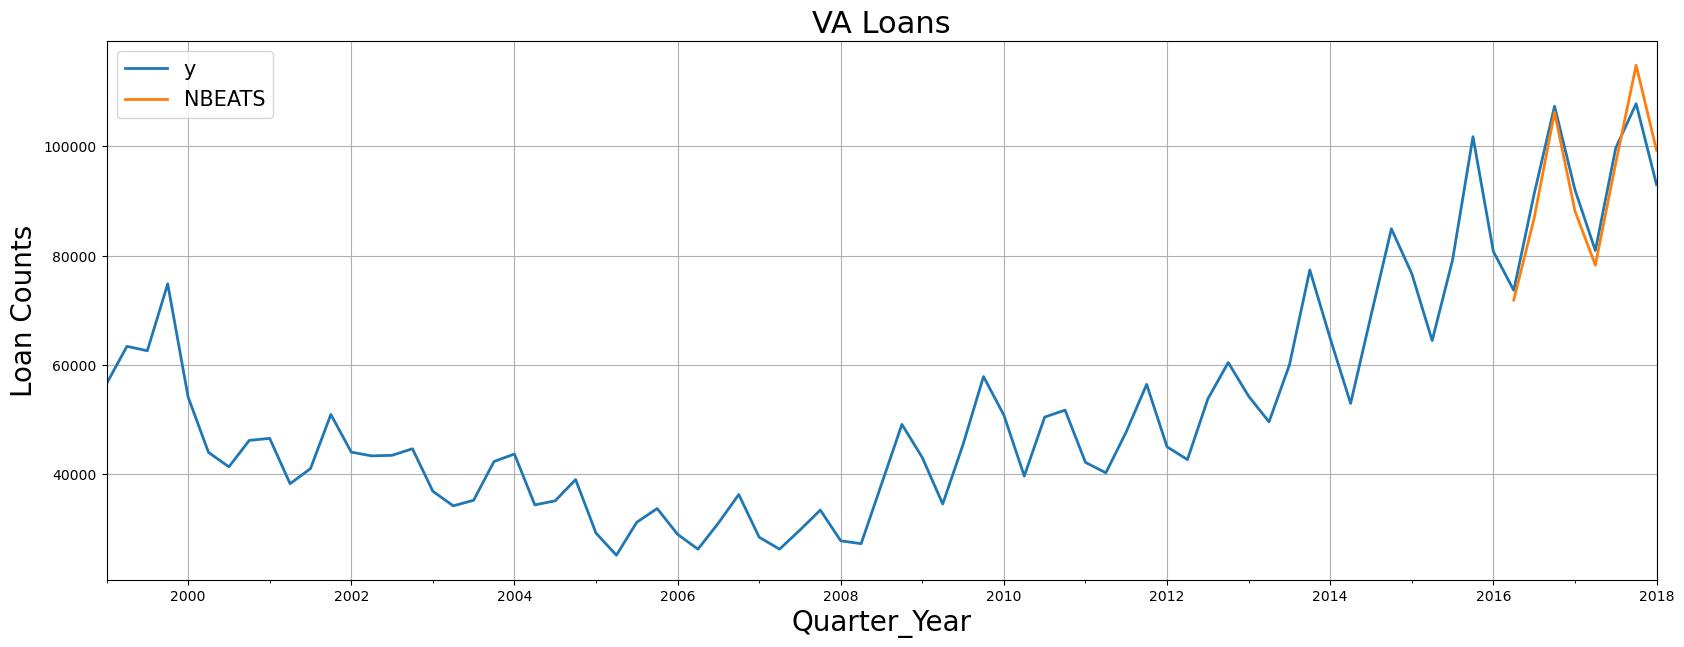

In [163]:
fig, ax = plt.subplots(1, 1, figsize = (20, 7))
plot_cov[['y', 'NBEATS']].plot(ax=ax, linewidth=2)
ax.set_title('VA Loans', fontsize=22)
ax.set_ylabel('Loan Counts', fontsize=20)
ax.set_xlabel('Quarter_Year', fontsize=20)
ax.legend(prop={'size': 15})
ax.grid()

# fine-tune NBEATSx model w/ 'DJTSMI' as covariate
* https://nixtla.mintlify.app/neuralforecast/models.nbeatsx.html
* scaling  !!! is must-have for DL

In [175]:
def objective(trial: optuna.Trial) -> float:
    global VA_train_df, VA_val_df, horizon #train_adj1, series_adj1_scaled

    param = {
        "input_size": trial.suggest_int("input_size", 8,56,8),
        'max_steps':trial.suggest_int("max_steps", 100, 500, 100),
        'activation':  trial.suggest_categorical('activation',['ReLU', 'LeakyReLU'])         
    }
    # remeber to use "NBEATSx" 
    models_cov = [NBEATSx(**param, h=horizon, hist_exog_list = ['DJTSMI', "TR10Y",	"BBBCY","MR30Y","PR", "HPI","CREP","VIX"],
                          scaler_type = "robust", random_seed=1234)]
    nbeats = NeuralForecast(models=models_cov, freq='Q')
    nbeats.fit(VA_train_df)
    preds = nbeats.predict().reset_index() #,series=train_price, past_covariates=series_adj1_scaled)
    preds['ds'] = list(VA_test_df.ds)
    preds = VA_test_df.merge(preds, how = 'left', on=['unique_id', 'ds'])
    
    # use the right columns name from predicted outcome => preds.NBEATSx
    accuracy = mean_absolute_percentage_error(np.array(VA_test_df.y), np.array(preds.NBEATSx))

    return accuracy

In [176]:
study = optuna.create_study(direction="minimize")

study.optimize(objective, n_trials=25, timeout=600)
print("Number of finished trials: {}".format(len(study.trials)))
print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))
print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

[I 2023-11-25 15:00:02,693] A new study created in memory with name: no-name-ebf04bc5-e2ef-44d9-abb7-f633339a6e5c
Seed set to 1234


Sanity Checking: |                                                                              | 0/? [00:00<?…

Training: |                                                                                     | 0/? [00:00<?…

Validation: |                                                                                   | 0/? [00:00<?…

Validation: |                                                                                   | 0/? [00:00<?…

Validation: |                                                                                   | 0/? [00:00<?…

Validation: |                                                                                   | 0/? [00:00<?…

Predicting: |                                                                                   | 0/? [00:00<?…

[I 2023-11-25 15:00:08,554] Trial 0 finished with value: 0.14710856106632053 and parameters: {'input_size': 40, 'max_steps': 400, 'activation': 'ReLU'}. Best is trial 0 with value: 0.14710856106632053.
Seed set to 1234


Sanity Checking: |                                                                              | 0/? [00:00<?…

Training: |                                                                                     | 0/? [00:00<?…

Validation: |                                                                                   | 0/? [00:00<?…

Predicting: |                                                                                   | 0/? [00:00<?…

[I 2023-11-25 15:00:10,007] Trial 1 finished with value: 0.1518095767822911 and parameters: {'input_size': 40, 'max_steps': 100, 'activation': 'ReLU'}. Best is trial 0 with value: 0.14710856106632053.
Seed set to 1234


Sanity Checking: |                                                                              | 0/? [00:00<?…

Training: |                                                                                     | 0/? [00:00<?…

Validation: |                                                                                   | 0/? [00:00<?…

Validation: |                                                                                   | 0/? [00:00<?…

Validation: |                                                                                   | 0/? [00:00<?…

Predicting: |                                                                                   | 0/? [00:00<?…

[I 2023-11-25 15:00:14,261] Trial 2 finished with value: 0.04680774488032869 and parameters: {'input_size': 32, 'max_steps': 300, 'activation': 'ReLU'}. Best is trial 2 with value: 0.04680774488032869.
Seed set to 1234


Sanity Checking: |                                                                              | 0/? [00:00<?…

Training: |                                                                                     | 0/? [00:00<?…

Validation: |                                                                                   | 0/? [00:00<?…

Validation: |                                                                                   | 0/? [00:00<?…

Validation: |                                                                                   | 0/? [00:00<?…

Validation: |                                                                                   | 0/? [00:00<?…

Predicting: |                                                                                   | 0/? [00:00<?…

[I 2023-11-25 15:00:19,976] Trial 3 finished with value: 0.0266965068633075 and parameters: {'input_size': 24, 'max_steps': 400, 'activation': 'LeakyReLU'}. Best is trial 3 with value: 0.0266965068633075.
Seed set to 1234


Sanity Checking: |                                                                              | 0/? [00:00<?…

Training: |                                                                                     | 0/? [00:00<?…

Validation: |                                                                                   | 0/? [00:00<?…

Validation: |                                                                                   | 0/? [00:00<?…

Validation: |                                                                                   | 0/? [00:00<?…

Predicting: |                                                                                   | 0/? [00:00<?…

[I 2023-11-25 15:00:24,356] Trial 4 finished with value: 0.08110752360240359 and parameters: {'input_size': 48, 'max_steps': 300, 'activation': 'ReLU'}. Best is trial 3 with value: 0.0266965068633075.
Seed set to 1234


Sanity Checking: |                                                                              | 0/? [00:00<?…

Training: |                                                                                     | 0/? [00:00<?…

Validation: |                                                                                   | 0/? [00:00<?…

Validation: |                                                                                   | 0/? [00:00<?…

Predicting: |                                                                                   | 0/? [00:00<?…

[I 2023-11-25 15:00:27,129] Trial 5 finished with value: 0.024224403696767552 and parameters: {'input_size': 24, 'max_steps': 200, 'activation': 'ReLU'}. Best is trial 5 with value: 0.024224403696767552.
Seed set to 1234


Sanity Checking: |                                                                              | 0/? [00:00<?…

Training: |                                                                                     | 0/? [00:00<?…

Validation: |                                                                                   | 0/? [00:00<?…

Predicting: |                                                                                   | 0/? [00:00<?…

[I 2023-11-25 15:00:28,665] Trial 6 finished with value: 0.06591107467280205 and parameters: {'input_size': 16, 'max_steps': 100, 'activation': 'ReLU'}. Best is trial 5 with value: 0.024224403696767552.
Seed set to 1234


Sanity Checking: |                                                                              | 0/? [00:00<?…

Training: |                                                                                     | 0/? [00:00<?…

Validation: |                                                                                   | 0/? [00:00<?…

Predicting: |                                                                                   | 0/? [00:00<?…

[I 2023-11-25 15:00:30,369] Trial 7 finished with value: 0.02818717745759268 and parameters: {'input_size': 24, 'max_steps': 100, 'activation': 'LeakyReLU'}. Best is trial 5 with value: 0.024224403696767552.
Seed set to 1234


Sanity Checking: |                                                                              | 0/? [00:00<?…

Training: |                                                                                     | 0/? [00:00<?…

Validation: |                                                                                   | 0/? [00:00<?…

Validation: |                                                                                   | 0/? [00:00<?…

Validation: |                                                                                   | 0/? [00:00<?…

Predicting: |                                                                                   | 0/? [00:00<?…

[I 2023-11-25 15:00:34,799] Trial 8 finished with value: 0.12893086108984442 and parameters: {'input_size': 8, 'max_steps': 300, 'activation': 'LeakyReLU'}. Best is trial 5 with value: 0.024224403696767552.
Seed set to 1234


Sanity Checking: |                                                                              | 0/? [00:00<?…

Training: |                                                                                     | 0/? [00:00<?…

Validation: |                                                                                   | 0/? [00:00<?…

Validation: |                                                                                   | 0/? [00:00<?…

Validation: |                                                                                   | 0/? [00:00<?…

Validation: |                                                                                   | 0/? [00:00<?…

Validation: |                                                                                   | 0/? [00:00<?…

Predicting: |                                                                                   | 0/? [00:00<?…

[I 2023-11-25 15:00:41,922] Trial 9 finished with value: 0.0413463043098983 and parameters: {'input_size': 32, 'max_steps': 500, 'activation': 'LeakyReLU'}. Best is trial 5 with value: 0.024224403696767552.
Seed set to 1234


Sanity Checking: |                                                                              | 0/? [00:00<?…

Training: |                                                                                     | 0/? [00:00<?…

Validation: |                                                                                   | 0/? [00:00<?…

Validation: |                                                                                   | 0/? [00:00<?…

Predicting: |                                                                                   | 0/? [00:00<?…

[I 2023-11-25 15:00:44,667] Trial 10 finished with value: 0.1121349157904925 and parameters: {'input_size': 56, 'max_steps': 200, 'activation': 'ReLU'}. Best is trial 5 with value: 0.024224403696767552.
Seed set to 1234


Sanity Checking: |                                                                              | 0/? [00:00<?…

Training: |                                                                                     | 0/? [00:00<?…

Validation: |                                                                                   | 0/? [00:00<?…

Validation: |                                                                                   | 0/? [00:00<?…

Validation: |                                                                                   | 0/? [00:00<?…

Validation: |                                                                                   | 0/? [00:00<?…

Validation: |                                                                                   | 0/? [00:00<?…

Predicting: |                                                                                   | 0/? [00:00<?…

[I 2023-11-25 15:00:51,146] Trial 11 finished with value: 0.05829492680611903 and parameters: {'input_size': 16, 'max_steps': 500, 'activation': 'LeakyReLU'}. Best is trial 5 with value: 0.024224403696767552.
Seed set to 1234


Sanity Checking: |                                                                              | 0/? [00:00<?…

Training: |                                                                                     | 0/? [00:00<?…

Validation: |                                                                                   | 0/? [00:00<?…

Validation: |                                                                                   | 0/? [00:00<?…

Validation: |                                                                                   | 0/? [00:00<?…

Validation: |                                                                                   | 0/? [00:00<?…

Predicting: |                                                                                   | 0/? [00:00<?…

[I 2023-11-25 15:00:56,686] Trial 12 finished with value: 0.0266965068633075 and parameters: {'input_size': 24, 'max_steps': 400, 'activation': 'LeakyReLU'}. Best is trial 5 with value: 0.024224403696767552.
Seed set to 1234


Sanity Checking: |                                                                              | 0/? [00:00<?…

Training: |                                                                                     | 0/? [00:00<?…

Validation: |                                                                                   | 0/? [00:00<?…

Validation: |                                                                                   | 0/? [00:00<?…

Predicting: |                                                                                   | 0/? [00:00<?…

[I 2023-11-25 15:00:59,427] Trial 13 finished with value: 0.026124808770790965 and parameters: {'input_size': 24, 'max_steps': 200, 'activation': 'LeakyReLU'}. Best is trial 5 with value: 0.024224403696767552.
Seed set to 1234


Sanity Checking: |                                                                              | 0/? [00:00<?…

Training: |                                                                                     | 0/? [00:00<?…

Validation: |                                                                                   | 0/? [00:00<?…

Validation: |                                                                                   | 0/? [00:00<?…

Predicting: |                                                                                   | 0/? [00:00<?…

[I 2023-11-25 15:01:02,206] Trial 14 finished with value: 0.1306167256142868 and parameters: {'input_size': 8, 'max_steps': 200, 'activation': 'ReLU'}. Best is trial 5 with value: 0.024224403696767552.
Seed set to 1234


Sanity Checking: |                                                                              | 0/? [00:00<?…

Training: |                                                                                     | 0/? [00:00<?…

Validation: |                                                                                   | 0/? [00:00<?…

Validation: |                                                                                   | 0/? [00:00<?…

Predicting: |                                                                                   | 0/? [00:00<?…

[I 2023-11-25 15:01:05,011] Trial 15 finished with value: 0.058517543764806335 and parameters: {'input_size': 16, 'max_steps': 200, 'activation': 'LeakyReLU'}. Best is trial 5 with value: 0.024224403696767552.
Seed set to 1234


Sanity Checking: |                                                                              | 0/? [00:00<?…

Training: |                                                                                     | 0/? [00:00<?…

Validation: |                                                                                   | 0/? [00:00<?…

Validation: |                                                                                   | 0/? [00:00<?…

Predicting: |                                                                                   | 0/? [00:00<?…

[I 2023-11-25 15:01:07,726] Trial 16 finished with value: 0.1415233210874658 and parameters: {'input_size': 40, 'max_steps': 200, 'activation': 'LeakyReLU'}. Best is trial 5 with value: 0.024224403696767552.
Seed set to 1234


Sanity Checking: |                                                                              | 0/? [00:00<?…

Training: |                                                                                     | 0/? [00:00<?…

Validation: |                                                                                   | 0/? [00:00<?…

Validation: |                                                                                   | 0/? [00:00<?…

Predicting: |                                                                                   | 0/? [00:00<?…

[I 2023-11-25 15:01:10,543] Trial 17 finished with value: 0.024224403696767552 and parameters: {'input_size': 24, 'max_steps': 200, 'activation': 'ReLU'}. Best is trial 5 with value: 0.024224403696767552.
Seed set to 1234


Sanity Checking: |                                                                              | 0/? [00:00<?…

Training: |                                                                                     | 0/? [00:00<?…

Validation: |                                                                                   | 0/? [00:00<?…

Predicting: |                                                                                   | 0/? [00:00<?…

[I 2023-11-25 15:01:12,075] Trial 18 finished with value: 0.049211545822068145 and parameters: {'input_size': 32, 'max_steps': 100, 'activation': 'ReLU'}. Best is trial 5 with value: 0.024224403696767552.
Seed set to 1234


Sanity Checking: |                                                                              | 0/? [00:00<?…

Training: |                                                                                     | 0/? [00:00<?…

Validation: |                                                                                   | 0/? [00:00<?…

Validation: |                                                                                   | 0/? [00:00<?…

Predicting: |                                                                                   | 0/? [00:00<?…

[I 2023-11-25 15:01:14,769] Trial 19 finished with value: 0.06399269100175548 and parameters: {'input_size': 16, 'max_steps': 200, 'activation': 'ReLU'}. Best is trial 5 with value: 0.024224403696767552.
Seed set to 1234


Sanity Checking: |                                                                              | 0/? [00:00<?…

Training: |                                                                                     | 0/? [00:00<?…

Validation: |                                                                                   | 0/? [00:00<?…

Validation: |                                                                                   | 0/? [00:00<?…

Validation: |                                                                                   | 0/? [00:00<?…

Predicting: |                                                                                   | 0/? [00:00<?…

[I 2023-11-25 15:01:18,884] Trial 20 finished with value: 0.08110752360240359 and parameters: {'input_size': 48, 'max_steps': 300, 'activation': 'ReLU'}. Best is trial 5 with value: 0.024224403696767552.
Seed set to 1234


Sanity Checking: |                                                                              | 0/? [00:00<?…

Training: |                                                                                     | 0/? [00:00<?…

Validation: |                                                                                   | 0/? [00:00<?…

Validation: |                                                                                   | 0/? [00:00<?…

Predicting: |                                                                                   | 0/? [00:00<?…

[I 2023-11-25 15:01:21,741] Trial 21 finished with value: 0.024224403696767552 and parameters: {'input_size': 24, 'max_steps': 200, 'activation': 'ReLU'}. Best is trial 5 with value: 0.024224403696767552.
Seed set to 1234


Sanity Checking: |                                                                              | 0/? [00:00<?…

Training: |                                                                                     | 0/? [00:00<?…

Validation: |                                                                                   | 0/? [00:00<?…

Validation: |                                                                                   | 0/? [00:00<?…

Predicting: |                                                                                   | 0/? [00:00<?…

[I 2023-11-25 15:01:24,766] Trial 22 finished with value: 0.024224403696767552 and parameters: {'input_size': 24, 'max_steps': 200, 'activation': 'ReLU'}. Best is trial 5 with value: 0.024224403696767552.
Seed set to 1234


Sanity Checking: |                                                                              | 0/? [00:00<?…

Training: |                                                                                     | 0/? [00:00<?…

Validation: |                                                                                   | 0/? [00:00<?…

Predicting: |                                                                                   | 0/? [00:00<?…

[I 2023-11-25 15:01:26,324] Trial 23 finished with value: 0.049211545822068145 and parameters: {'input_size': 32, 'max_steps': 100, 'activation': 'ReLU'}. Best is trial 5 with value: 0.024224403696767552.
Seed set to 1234


Sanity Checking: |                                                                              | 0/? [00:00<?…

Training: |                                                                                     | 0/? [00:00<?…

Validation: |                                                                                   | 0/? [00:00<?…

Validation: |                                                                                   | 0/? [00:00<?…

Predicting: |                                                                                   | 0/? [00:00<?…

[I 2023-11-25 15:01:29,403] Trial 24 finished with value: 0.06399269100175548 and parameters: {'input_size': 16, 'max_steps': 200, 'activation': 'ReLU'}. Best is trial 5 with value: 0.024224403696767552.


Number of finished trials: 25
Best trial:
  Value: 0.024224403696767552
  Params: 
    input_size: 24
    max_steps: 200
    activation: ReLU


In [180]:
#parse best parameters
trial.params.items()

dict_items([('input_size', 24), ('max_steps', 200), ('activation', 'ReLU')])

In [183]:
models_cov = [NBEATSx(input_size= trial.params['input_size'], h=horizon,
                     max_steps=trial.params['max_steps'],
                     activation = trial.params['activation'],    
                      hist_exog_list = ['DJTSMI', "TR10Y","BBBCY","MR30Y","PR", "HPI","CREP","VIX"], 
                      scaler_type = "robust",
                     random_seed=1234)]

nbeats = NeuralForecast(models=models_cov,   freq='Q')
nbeats.fit(VA_train_df)
preds = nbeats.predict().reset_index() #,series=train_price, past_covariates=series_adj1_scaled)
preds['ds'] = list(VA_test_df.ds)
preds = VA_test_df.merge(preds, how = 'left', on=['unique_id', 'ds'])

Seed set to 1234


Sanity Checking: |                                                                              | 0/? [00:00<?…

Training: |                                                                                     | 0/? [00:00<?…

Validation: |                                                                                   | 0/? [00:00<?…

Validation: |                                                                                   | 0/? [00:00<?…

Predicting: |                                                                                   | 0/? [00:00<?…

In [184]:
#NBEATSx rmse
nbeats_cov_x = mean_squared_error(VA_test_df.y, preds.NBEATSx, squared = False) 
nbeats_cov_x #5204

3123.770763896977

In [185]:
nbeats_mape_x = mean_absolute_percentage_error(VA_test_df.y, preds.NBEATSx) * 100
nbeats_mape_x #5.20

2.4224403696767554

In [186]:
plot_cov = pd.concat([VA_train_df, preds]).set_index('ds')

In [188]:
fig, ax = plt.subplots(1, 1, figsize = (20, 7))
plot_cov[['y', 'NBEATSx']].plot(ax=ax, linewidth=2)
ax.set_title('VA Loans w/ covariates', fontsize=22)
ax.set_ylabel('Loan Counts', fontsize=20)
ax.set_xlabel('Quarter_Year', fontsize=20)
ax.legend(prop={'size': 15})
ax.grid()